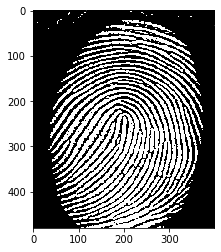

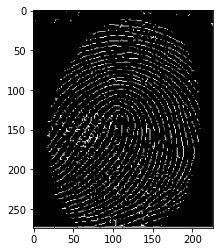

In [38]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
from skimage.morphology import disk 

def filtchk(sel_region,s):
    y = True 
    for p in range(0,3):
        for q in range(0,3):
            if s[p,q]!=-1 and sel_region[p,q]!=s[p,q]:
                return False
    return True                

def closing(im,disk):    
    dil = cv2.dilate(im,disk)
    eroded = cv2.erode(dil,disk)
    return eroded


def filt(im,s):
    final = im
    sel_region = np.zeros((3,3))
    for i in range(1,h-1):
        for j in range(1,w-1):
#             center_x = i
#             center_y = j
            sel_region = im[i-1:i+2,j-1:j+2]
            if filtchk(sel_region,s):
                final[i,j] = 0        
    return final        


def skeletonization(im,s1,s1_90,s1_180,s1_270,s2,s2_90,s2_180,s2_270):

#     plt.imshow(im,'gray')
#     print(np.amax(im))
    while True:
        temp = im
        for i in range(4):
            temp = filt(temp,s1)    
            temp = filt(temp,s2)    
            s1 = np.rot90(s1)
            s2 = np.rot90(s2)

#         plt.figure()
#         plt.imshow(im,'gray') 
#         temp = (temp < 127).astype(np.uint8)
        difference = np.mean(np.abs(im-temp))
#         print(difference)
        if difference <= 1:
            break
        else:
            im = temp
            
#     plt.figure()
#     plt.imshow(temp,'gray')
        
    return temp        
    

fp = cv2.imread('../input/fp.jpg',0)
star = cv2.imread('../input/star.png',0)
h = fp.shape[0]
w = fp.shape[1]
s1 = np.array([[0,0,0],[-1,1,-1],[1,1,1]],dtype='int')
s2 = np.array([[-1,0,0],[1,1,0],[-1,1,-1]],dtype='int')
ndl = cv2.imread('../input/needle.png',0)
ndl_skl = cv2.imread('../input/ndl_skl.png',0)
s1_90 = np.rot90(s1,1)
s2_90 = np.rot90(s2,1)
s1_180 = np.rot90(s1,2)
s2_180 = np.rot90(s2,2)
s1_270 = np.rot90(s1,3)
s2_270 = np.rot90(s2,3)

thresh = 127
# fp = cv2.threshold(fp, thresh, 255, cv2.THRESH_BINARY)[1]

disk1 = disk(5)
star_skl = cv2.imread('../input/star_skl.png',0)
fp = cv2.threshold(fp, thresh, 1, cv2.THRESH_BINARY)[1]

hole = cv2.imread('../input/hol.png',0)
hole_skl = cv2.imread('../input/hole_skl.png',0)
fp = np.invert(fp)
#     print('hi')
final = cv2.imread('../input/skel.png',0)
# fp = closing(fp,disk1)
    
# inv = (fp==0).astype(int)
irr = cv2.imread('../input/irr.png',0)
irr_skl = cv2.imread('../input/irr_skl.png',0)

plt.imshow(fp,'gray')
final2 = skeletonization(fp,s1,s1_90,s1_180,s1_270,s2,s2_90,s2_180,s2_270)
plt.figure()
plt.imshow(final,'gray')

s1 detects edges and curves that are similar to edges

s2 detects right angled triangles

We need multiple passes , to get a thinner skeleton after each iteration , and rotating the kernel by 90 deg. helps to detect horizontal and vertical edges ,also right hand corners 

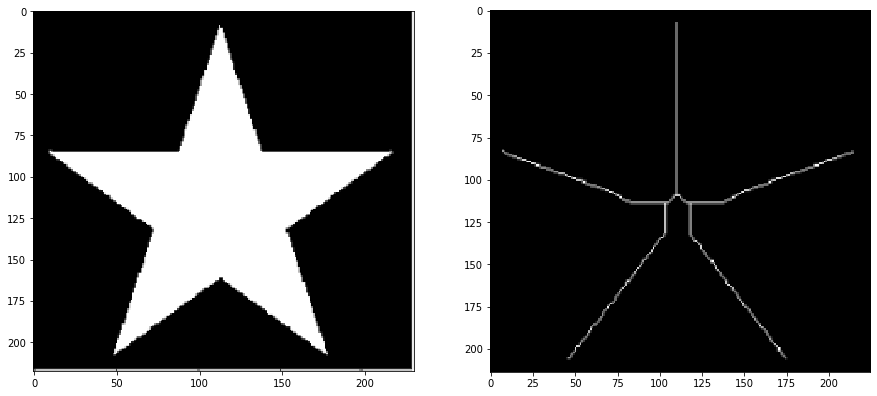

In [39]:

def filt(im,s):
    final = im
    sel_region = np.zeros((3,3))
    for i in range(1,h-1):
        for j in range(1,w-1):
#             center_x = i
#             center_y = j
            sel_region = im[i-1:i+2,j-1:j+2]
            if filtchk(sel_region,s):
                final[i,j] = 0        
    return final        


plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(star,'gray')
plt.subplot(1,2,2)
plt.imshow(star_skl,'gray')

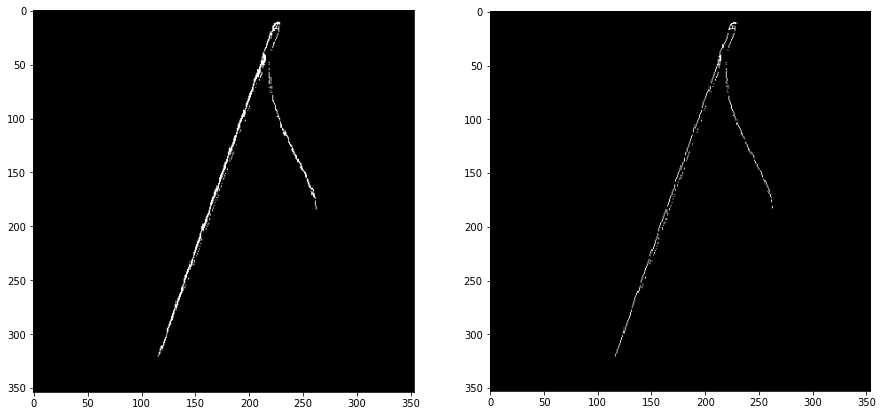

In [40]:
def filt(im,s):
    final = im
    sel_region = np.zeros((3,3))
    for i in range(1,h-1):
        for j in range(1,w-1):
#             center_x = i
#             center_y = j
            sel_region = im[i-1:i+2,j-1:j+2]
            if filtchk(sel_region,s):
                final[i,j] = 0        
    return final        

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(ndl,'gray')
plt.subplot(1,2,2)
plt.imshow(ndl_skl,'gray')

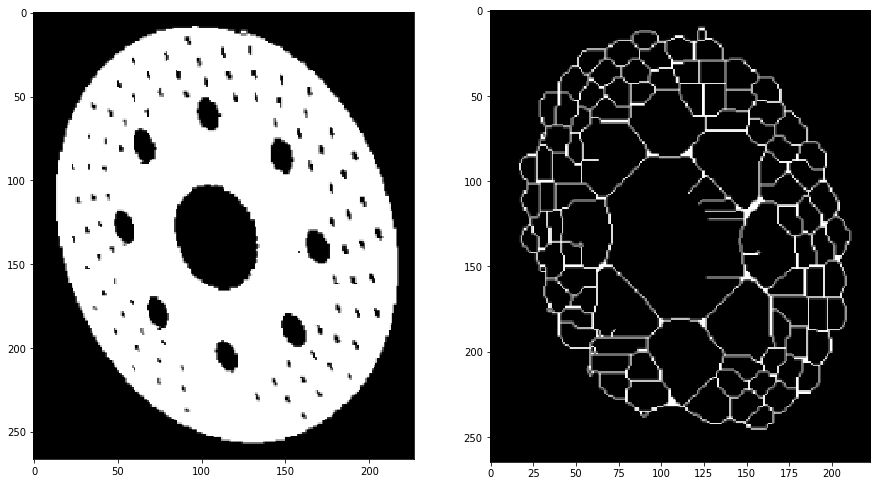

In [41]:
def filt(im,s):
    final = im
    sel_region = np.zeros((3,3))
    for i in range(1,h-1):
        for j in range(1,w-1):
#             center_x = i
#             center_y = j
            sel_region = im[i-1:i+2,j-1:j+2]
            if filtchk(sel_region,s):
                final[i,j] = 0        
    return final        

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(hole,'gray')
plt.subplot(1,2,2)
plt.imshow(hole_skl,'gray')

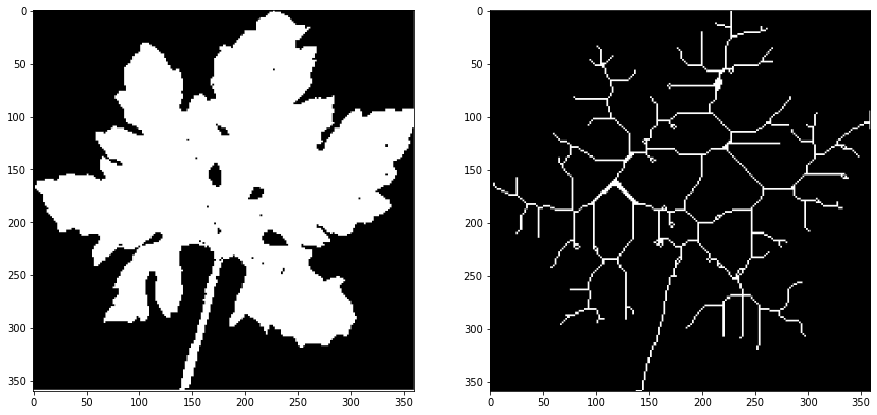

In [42]:
def filt(im,s):
    final = im
    sel_region = np.zeros((3,3))
    for i in range(1,h-1):
        for j in range(1,w-1):
#             center_x = i
#             center_y = j
            sel_region = im[i-1:i+2,j-1:j+2]
            if filtchk(sel_region,s):
                final[i,j] = 0        
    return final        

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(irr,'gray')
plt.subplot(1,2,2)
plt.imshow(irr_skl,'gray')